In [44]:
print("A1")
import pandas as pd
import numpy as np

# Load Excel file
file_path = "C:/Users/Jaidev sharma/Downloads/Lab Session Data.xlsx" # Update this path if needed
xls = pd.ExcelFile(file_path)

# Load "Purchase data" sheet
purchase_data = pd.read_excel(xls, sheet_name="Purchase data")

# Keep only the relevant columns
relevant_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']
cleaned_data = purchase_data[relevant_columns].dropna()

# Define matrices A and C
A = cleaned_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = cleaned_data[['Payment (Rs)']].values

# Compute dimensionality of the vector space
vector_space_dim = A.shape[1]

# Number of vectors in the space
num_vectors = A.shape[0]

# Rank of matrix A
rank_A = np.linalg.matrix_rank(A)

# Compute pseudo-inverse and solve for cost vector X
A_pinv = np.linalg.pinv(A)
X = A_pinv @ C

# Output results
print("Dimensionality of the vector space:", vector_space_dim)
print("Number of vectors:", num_vectors)
print("Rank of Matrix A:", rank_A)
print("Cost of each product:")
print("Candy       = ₹", round(X[0][0], 2))
print("Mango (Kg)  = ₹", round(X[1][0], 2))
print("Milk Packet = ₹", round(X[2][0], 2))


A1
Dimensionality of the vector space: 3
Number of vectors: 10
Rank of Matrix A: 3
Cost of each product:
Candy       = ₹ 1.0
Mango (Kg)  = ₹ 55.0
Milk Packet = ₹ 18.0


In [45]:
print("A2")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Load Excel file
file_path = "C:/Users/Jaidev sharma/Downloads/Lab Session Data.xlsx"
xls = pd.ExcelFile(file_path)
data = pd.read_excel(xls, sheet_name="Purchase data")

# Clean and keep relevant columns
data = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()

# Add Label column: RICH if Payment > 200, else POOR
data['Label'] = data['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

# Define features and target
X = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


A2
Classification Report:
              precision    recall  f1-score   support

        POOR       0.67      1.00      0.80         2
        RICH       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



A3


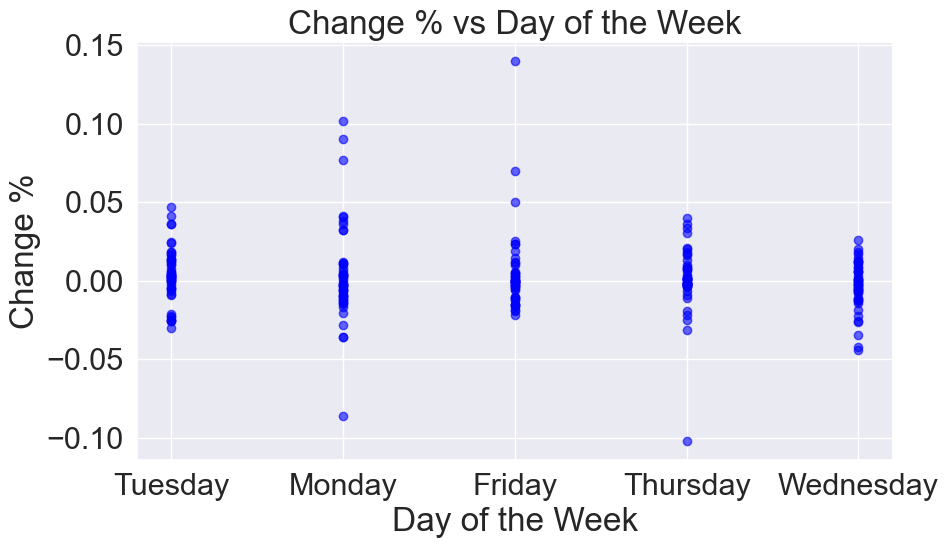

Population Mean of Price: 1560.66
Variance of Price: 58732.37
Sample Mean on Wednesdays: 1550.71
Sample Mean in April: 1698.95
Probability of Loss: 0.498
Probability of Profit on Wednesday: 0.42
Conditional Probability of Profit given Wednesday: 0.42


In [46]:
print("A3")
import pandas as pd
import statistics
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/Jaidev sharma/Downloads/Lab Session Data.xlsx"  # Use correct path if needed
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="IRCTC Stock Price")

# Ensure proper column names
df.columns = df.columns.str.strip()

# Convert date column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Add weekday and month columns
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

# Get the 'Price' column (column D is usually 4th column, confirm actual column name)
price_col = df.columns[3]
prices = df[price_col].dropna()

# 1. Mean and variance of all price data
mean_price = statistics.mean(prices)
var_price = statistics.variance(prices)

# 2. Sample mean for all Wednesdays
wednesday_prices = df[df['Weekday'] == 'Wednesday'][price_col]
mean_wed = statistics.mean(wednesday_prices)

# 3. Sample mean for April
april_prices = df[df['Month'] == 'April'][price_col]
mean_april = statistics.mean(april_prices)

# 4. Probability of making a loss (Chg% < 0)
chg_col = df.columns[8]
chg_percent = df[chg_col].dropna()
loss_prob = sum(chg_percent < 0) / len(chg_percent)

# 5. Probability of profit on Wednesday
profit_wed = df[(df['Weekday'] == 'Wednesday') & (df[chg_col] > 0)]
prob_profit_wed = len(profit_wed) / len(df[df['Weekday'] == 'Wednesday'])

# 6. Conditional probability of profit given Wednesday
# Same as above: P(Profit | Wednesday)
conditional_prob = prob_profit_wed

# 7. Scatter plot of Chg% vs Day of Week
plt.figure(figsize=(10, 6))
plt.scatter(df['Weekday'], df[chg_col], color='blue', alpha=0.6)
plt.title('Change % vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Change %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results
print("Population Mean of Price:", round(mean_price, 2))
print("Variance of Price:", round(var_price, 2))
print("Sample Mean on Wednesdays:", round(mean_wed, 2))
print("Sample Mean in April:", round(mean_april, 2))
print("Probability of Loss:", round(loss_prob, 4))
print("Probability of Profit on Wednesday:", round(prob_profit_wed, 4))
print("Conditional Probability of Profit given Wednesday:", round(conditional_prob, 4))


In [47]:
print("A4")
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# File path and load sheet
file_path = "C:/Users/Jaidev sharma/Downloads/Lab Session Data.xlsx"
xls = pd.ExcelFile(file_path)
print("Available Sheets:", xls.sheet_names)

# Load thyroid0387_UCI sheet
df = pd.read_excel(xls, sheet_name="thyroid0387_UCI")

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Convert numeric columns
df = df.apply(pd.to_numeric, errors='ignore')

# 1. Attribute Types
attribute_types = df.dtypes

# 2. Split columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 3. Encoding
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    unique_vals = df_encoded[col].dropna().unique()
    if len(unique_vals) <= 10:
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col)
    else:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

# 4. Missing Values
missing_report = df.isna().sum()
missing_report = missing_report[missing_report > 0]

# 5. Numeric Ranges
numeric_ranges = df[numeric_cols].agg(['min', 'max']).T

# 6. Outlier Detection using IQR
outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outlier_counts[col] = is_outlier.sum()
outlier_counts = pd.Series(outlier_counts)

# 7. Mean & Std
mean_std_report = df[numeric_cols].agg(['mean', 'std']).T

# ---------------- OUTPUT ----------------
print("\n1. Attribute Types:\n", attribute_types)
print("\n2. Missing Values:\n", missing_report)
print("\n3. Numeric Column Ranges:\n", numeric_ranges)
print("\n4. Outlier Counts (IQR method):\n", outlier_counts)
print("\n5. Mean and Std Dev of Numeric Columns:\n", mean_std_report)


A4
Available Sheets: ['Purchase data', 'IRCTC Stock Price', 'thyroid0387_UCI', 'marketing_campaign']

1. Attribute Types:
 Record ID                      int64
age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured              

In [49]:
print("A5")
import pandas as pd
import numpy as np

# Load Excel sheet
file_path = "C:/Users/Jaidev sharma/Downloads/Lab Session Data.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="thyroid0387_UCI")

# Convert all columns to numeric where possible (non-numeric → NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Identify binary columns (only 0s and 1s, ignoring NaNs)
binary_cols = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
    'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
    'FTI measured', 'TBG measured'
]

data_binary = df[binary_cols].replace({'t': 1, 'f': 0})

v1 = data_binary.iloc[0].values
v2 = data_binary.iloc[1].values

f11 = ((v1 == 1) & (v2 == 1)).sum()
f00 = ((v1 == 0) & (v2 == 0)).sum()
f10 = ((v1 == 1) & (v2 == 0)).sum()
f01 = ((v1 == 0) & (v2 == 1)).sum()

JC = f11 / (f01 + f10 + f11)
SMC = (f11 + f00) / (f11 + f00 + f10 + f01)

print("Jaccard Coefficient : ",JC)
print("Simple Matching Coefficient : ",SMC)
# Interpretation
if JC > SMC:
    print("\nJC > SMC → JC is stricter, focuses on presence (1s).")
elif JC < SMC:
    print("\nSMC > JC → SMC considers all matches, better if 0s and 1s are equally important.")
else:
    print("\nJC == SMC → Equal behavior.")

A5
Jaccard Coefficient :  0.25
Simple Matching Coefficient :  0.85

SMC > JC → SMC considers all matches, better if 0s and 1s are equally important.


In [50]:
print("A6")
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load Excel file
file_path = "C:/Users/Jaidev sharma/Downloads/Lab Session Data.xlsx"
xls = pd.ExcelFile(file_path)

# List of sheets to process
sheets = ["Purchase data", "IRCTC Stock Price", "thyroid0387_UCI", "marketing_campaign"]

for sheet in sheets:
    # Read sheet
    data = pd.read_excel(file_path, sheet_name=sheet)

    # Select only numerical features
    features_taken = data.select_dtypes(include=["number"])

    # Fill missing values with 0
    features_filled = features_taken.fillna(0)

    # Get first two rows as vectors
    vector1 = features_filled.iloc[0].values.reshape(1, -1)
    vector2 = features_filled.iloc[1].values.reshape(1, -1)

    # Compute cosine similarity
    similarity_matrix = cosine_similarity(vector1, vector2)

    # Print results
    print(f"\nCosine Similarity Measure for Sheet: {sheet}")
    print("Cosine Similarity Matrix:\n", similarity_matrix)
    print("Cosine Similarity (Row 1 vs Row 2):", round(similarity_matrix[0][0], 4))


A6

Cosine Similarity Measure for Sheet: Purchase data
Cosine Similarity Matrix:
 [[0.98883726]]
Cosine Similarity (Row 1 vs Row 2): 0.9888

Cosine Similarity Measure for Sheet: IRCTC Stock Price
Cosine Similarity Matrix:
 [[0.99999531]]
Cosine Similarity (Row 1 vs Row 2): 1.0

Cosine Similarity Measure for Sheet: thyroid0387_UCI
Cosine Similarity Matrix:
 [[1.]]
Cosine Similarity (Row 1 vs Row 2): 1.0

Cosine Similarity Measure for Sheet: marketing_campaign
Cosine Similarity Matrix:
 [[0.99871368]]
Cosine Similarity (Row 1 vs Row 2): 0.9987


A7


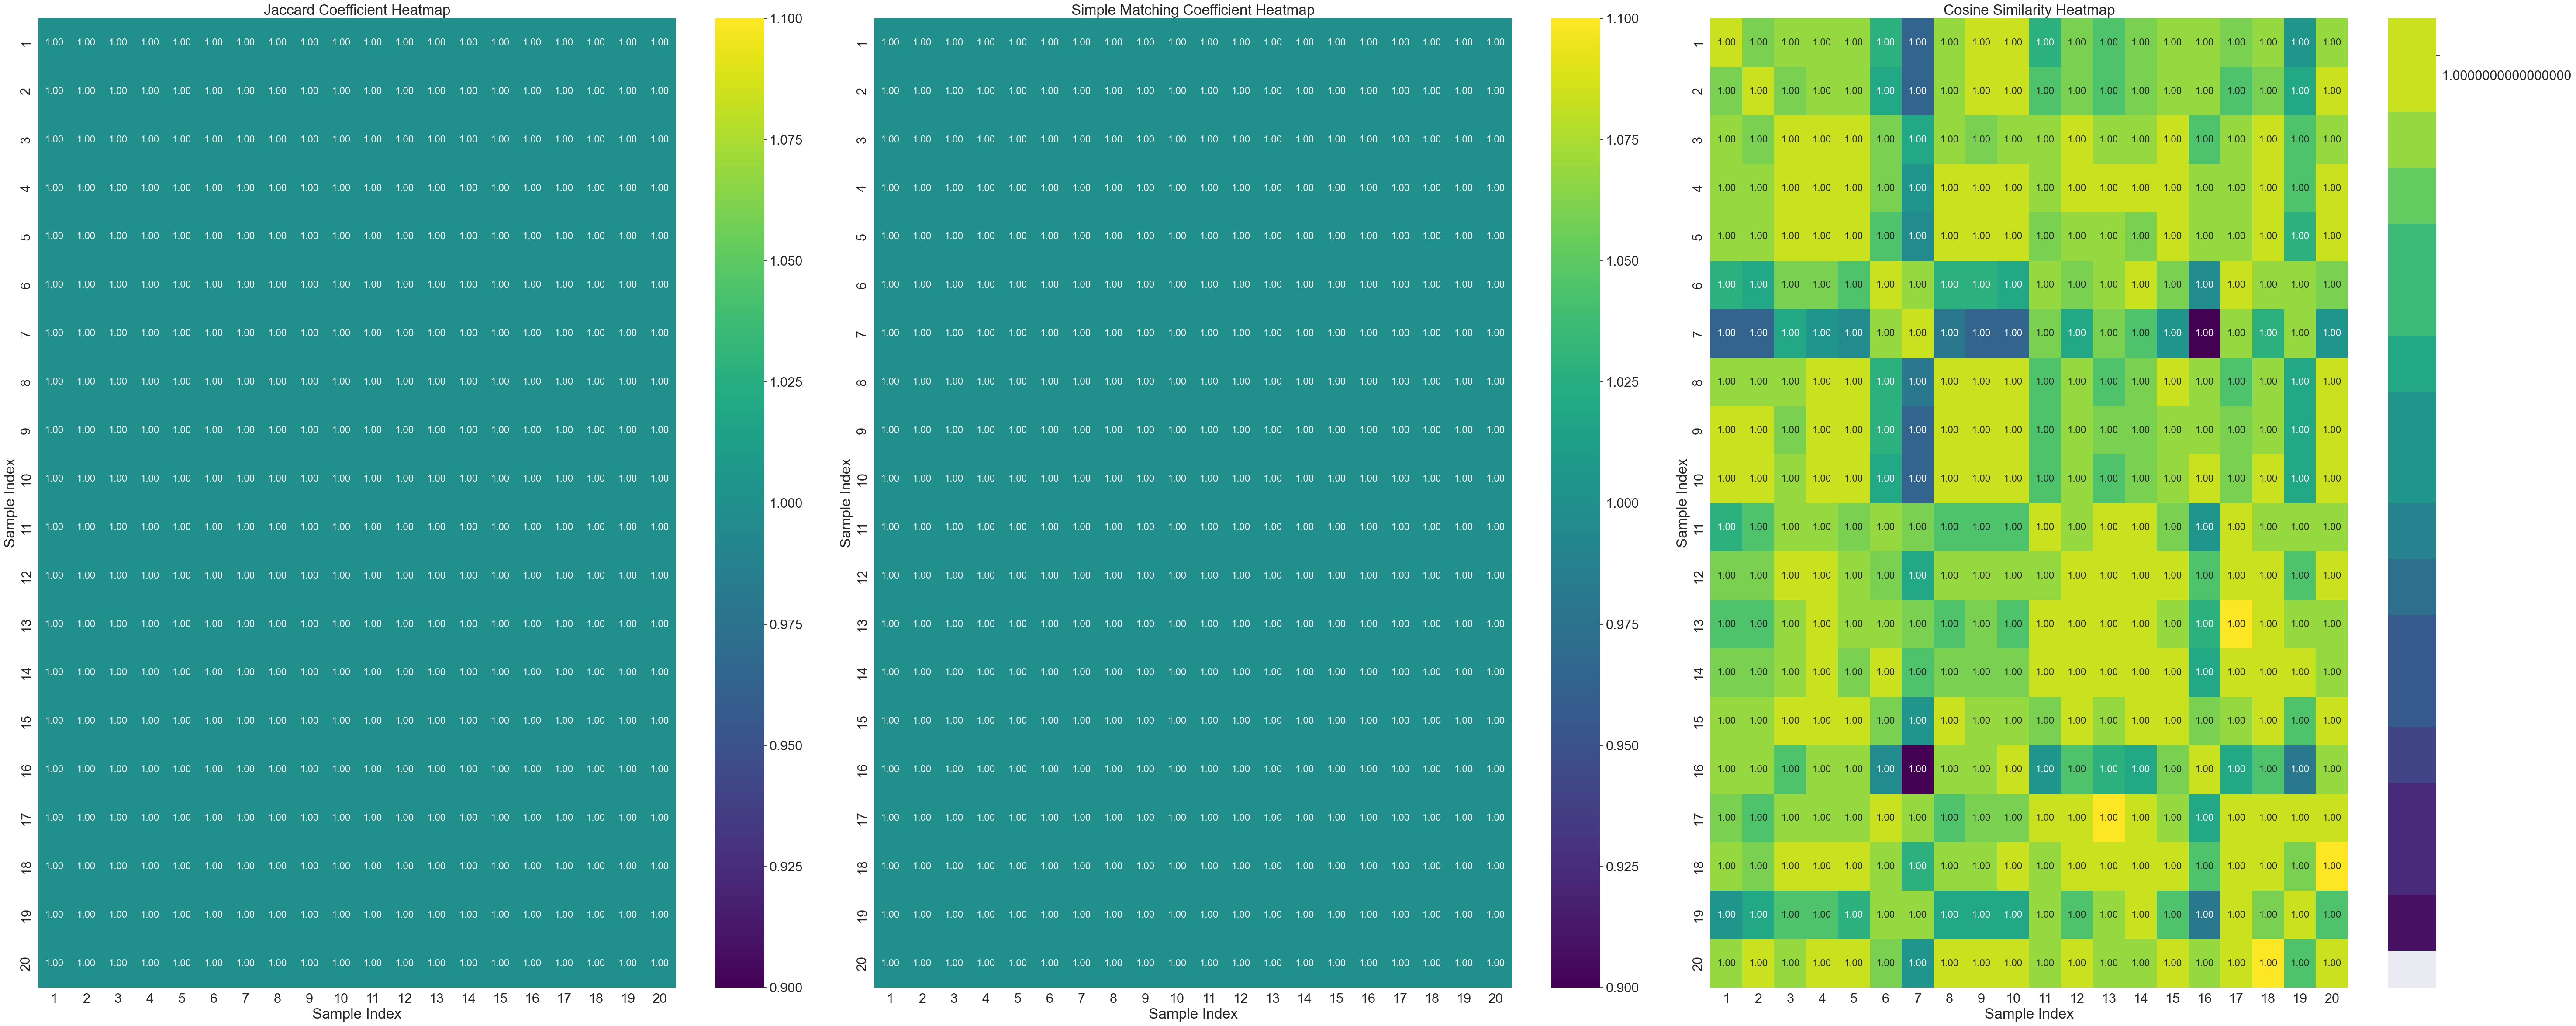

Jaccard Coefficient Matrix:
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1

In [51]:
print("A7")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel sheet
file_path = "C:/Users/Jaidev sharma/Downloads/Lab Session Data.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="thyroid0387_UCI")

# Extract numeric features (excluding non-numeric columns)
X = df.select_dtypes(include=[np.number]).values

# Take first 20 observation vectors
X_20 = X[:20]
n_samples = X_20.shape[0]

# Function to calculate Jaccard Coefficient
def jaccard_coefficient(x, y):
    x_bin = (x > np.mean(x)).astype(int)
    y_bin = (y > np.mean(y)).astype(int)
    
    intersection = np.sum(x_bin & y_bin)
    union = np.sum(x_bin | y_bin)
    
    if union == 0:
        return 1.0
    return intersection / union

# Function to calculate Simple Matching Coefficient
def simple_matching_coefficient(x, y):
    x_bin = (x > np.mean(x)).astype(int)
    y_bin = (y > np.mean(y)).astype(int)
    
    matches = np.sum(x_bin == y_bin)
    total = len(x_bin)
    
    return matches / total

# Function to calculate Cosine Similarity
def cosine_similarity(x, y):
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    
    if norm_x == 0 or norm_y == 0:
        return 0
    return dot_product / (norm_x * norm_y)

# Initialize similarity matrices
jc_matrix = np.zeros((n_samples, n_samples))
smc_matrix = np.zeros((n_samples, n_samples))
cos_matrix = np.zeros((n_samples, n_samples))

# Calculate similarity coefficients for all pairs
for i in range(n_samples):
    for j in range(n_samples):
        if i == j:
            jc_matrix[i, j] = 1.0
            smc_matrix[i, j] = 1.0
            cos_matrix[i, j] = 1.0
        else:
            jc_matrix[i, j] = jaccard_coefficient(X_20[i], X_20[j])
            smc_matrix[i, j] = simple_matching_coefficient(X_20[i], X_20[j])
            cos_matrix[i, j] = cosine_similarity(X_20[i], X_20[j])

# Create heatmaps
fig, axes = plt.subplots(1, 3, figsize=(60, 24))

# Jaccard Coefficient Heatmap
sns.heatmap(jc_matrix, annot=True, fmt='.2f', cmap='viridis', 
            xticklabels=range(1, 21), yticklabels=range(1, 21), ax=axes[0], annot_kws={'size': 16})
axes[0].set_title('Jaccard Coefficient Heatmap')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Sample Index')

# Simple Matching Coefficient Heatmap
sns.heatmap(smc_matrix, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=range(1, 21), yticklabels=range(1, 21), ax=axes[1], annot_kws={'size': 16})
axes[1].set_title('Simple Matching Coefficient Heatmap')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Sample Index')

# Cosine Similarity Heatmap
sns.heatmap(cos_matrix, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=range(1, 21), yticklabels=range(1, 21), ax=axes[2], annot_kws={'size': 16})
axes[2].set_title('Cosine Similarity Heatmap')
axes[2].set_xlabel('Sample Index')
axes[2].set_ylabel('Sample Index')

plt.tight_layout()
plt.show()

# Display the coefficient matrices
print("Jaccard Coefficient Matrix:")
print(jc_matrix)
print("\nSimple Matching Coefficient Matrix:")
print(smc_matrix)
print("\nCosine Similarity Matrix:")
print(cos_matrix)

In [52]:
print("A8")
import pandas as pd
import numpy as np

# Load data
file_path = "C:/Users/Jaidev sharma/Downloads/Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Step 1: Replace ONLY '?' with NaN (keep 'f'/'t' as-is)
data.replace('?', np.nan, inplace=True)

# Step 2: Identify numeric columns (skip categorical like 'sex', 'referral source')
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Impute missing values
for column in data.columns:
    if data[column].isnull().sum() > 0:  # If column has missing values
        if column not in numeric_cols:  # Categorical → Mode
            mode_val = data[column].mode()[0] if not data[column].mode().empty else "Unknown"
            data[column].fillna(mode_val, inplace=True)
            print(f"🔹 {column}: Filled with MODE ({mode_val})")
        else:  # Numeric → Mean or Median
            # Check for outliers (if >10% of data is extreme, use median)
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            outlier_count = ((data[column] < (Q1 - 1.5*IQR)) | (data[column] > (Q3 + 1.5*IQR))).sum()
            
            if outlier_count > 0.1 * len(data):  # If >10% outliers, use median
                median_val = data[column].median()
                data[column].fillna(median_val, inplace=True)
                print(f"🔹 {column}: Filled with MEDIAN ({median_val})")
            else:  # Otherwise, use mean
                mean_val = data[column].mean()
                data[column].fillna(mean_val, inplace=True)
                print(f"🔹 {column}: Filled with MEAN ({mean_val})")

# Show first 5 rows after imputation
print("\n✅ Final Data (First 5 Rows):")
print(data.head())

A8
🔹 sex: Filled with MODE (F)
🔹 TSH: Filled with MEAN (5.218402753781513)
🔹 T3: Filled with MEAN (1.970628805724726)
🔹 TT4: Filled with MEAN (108.70030469644902)
🔹 T4U: Filled with MEAN (0.9760557216309935)
🔹 FTI: Filled with MEAN (113.64074551935484)
🔹 TBG: Filled with MEAN (29.87005729512894)

✅ Final Data (First 5 Rows):
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3     

In [53]:
print("A9")
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the third sheet
file_path = "C:/Users/Jaidev sharma/Downloads/Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Replace '?' with NaN
df = df.replace('?', np.nan)

# Convert numeric-looking columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Impute numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Define columns for scaling
minmax_cols = ['TT4', 'T4U', 'TBG']  # scale between 0 and 1
zscore_cols = ['FTI', 'TSH']         # standardize to mean 0, std 1

# Convert and re-impute these columns
for col in minmax_cols + zscore_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Apply MinMax Scaling
minmax_scaler = MinMaxScaler()
df[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])

# Apply Z-Score Scaling
zscore_scaler = StandardScaler()
df[zscore_cols] = zscore_scaler.fit_transform(df[zscore_cols])

# Final output
print(df.head())


A9
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured       TT4 T4U measured       T4U FTI measured      FTI  \
0            f  0.170569            f  0.365741            f -0.10664   
1            t  0.210